## <font color=blue> Understanding the Dataset</font> ##

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load the dataset 
df_cancer = pd.read_csv('./Breast cancer.csv')

# Display the first few rows to understand the dataset structure
df_cancer.head()

,case,ARM,AGE,BMI,density
0,1,1,38,21.8,40
1,0,1,43,32.3,5
2,0,1,46,23.0,45
3,0,2,52,19.6,40
4,0,1,59,26.2,40


The dataset contains the following columns:

**case**: Indicates whether the participant developed breast cancer (1 = cancer [case], 0 = no cancer [control]).

**ARM**: Specifies if the participant received a placebo (1) or tamoxifen (2) treatment.

**AGE**: The participant's age at the time of the first mammogram (continuous variable).

**BMI**: The participant's Body Mass Index (BMI), which is a measure of body fat based on weight and height (continuous variable).

**density**: The participant's breast density, which indicates the amount of dense tissue seen on a mammogram (continuous variable)

From the dataset, it is given that:

* Outcome variable: case (binary: 1 = cancer, 0 = no cancer)

* Predictor variables: AGE, BMI, and density (all continuous)

In [2]:
# Count the values in the 'case' column
case_counts = df_cancer['case'].value_counts()
case_counts

case
0    942
1    123
Name: count, dtype: int64

In the breast cancer dataset, the distribution of the case values is as follows:

**1 (Cancer): 123 instances**

**0 (No cancer): 942 instances**

This shows that the dataset is imbalanced, with only about 11.6% of the data representing cancer cases. This class imbalance may likely contribute to the models' poor performance in detecting cancer cases. 

## <font color=blue> Data Cleaning and Preprocessing </font> ##

### Handling Missing Values ###

Let's identify any missing values

In [3]:
# Check for missing values
missing_values = df_cancer.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

case        0
ARM         0
AGE         0
BMI        16
density     0
dtype: int64


The dataset has 16 missing values in the BMI column. We will impute values using the median imputation technique. This method is chosen because it preserves the dataset's size and ensures the missing values are filled in a robust, consistent manner.

In [4]:
# Impute missing BMI values with the median
df_cancer['BMI'] = df_cancer['BMI'].fillna(df_cancer['BMI'].median())

# Check if the missing values have been filled
missing_values = df_cancer.isnull().sum()

# Print the number of missing values 
print(missing_values)

case       0
ARM        0
AGE        0
BMI        0
density    0
dtype: int64


The missing values in the BMI column have been successfully filled, as indicated by the count of 0 missing values after median imputation.

### Descriptive Statistics ###

Let's first give a statistical summary of three variables: Age, BMI (Body Mass Index) and Mammographic dDensity.

In [5]:
# Summarize continuous variables (AGE, BMI, density)
continuous_var = df_cancer[['AGE', 'BMI', 'density']].describe()
continuous_var

,AGE,BMI,density
count,1065.000000,1065.000000,1065.000000
mean,50.165258,26.702160,44.450704
std,6.213080,4.799732,30.175764
min,35.000000,17.600000,0.000000
25%,46.000000,23.300000,15.000000
50%,49.000000,25.700000,40.000000
75%,54.000000,29.300000,70.000000
max,70.000000,50.400000,100.000000


Here's a breakdown of each:

**1. AGE (years):**
* **Count**: 1065 women had their ages recorded.
* **Mean (Average)**: The average age is 50.17 years.
* **Standard Deviation (std)**: The age variation is 6.21 years, meaning most women are within 6.21 years above or below the average.
* **Min**: The youngest participant is 35 years old.
* **25th Percentile (25%)**: 25% of the women are younger than 46 years.
* **Median (50%)**: The median (or middle value) is 49 years, meaning half the women are younger and half are older than 49.
* **75th Percentile (75%)**: 75% of the women are younger than 54 years.
* **Max**: The oldest participant is 70 years old.


**2. BMI (Body Mass Index, kg/m²):**
* **Count**: 1065 women had their BMI recorded.
* **Mean**: The average BMI is 26.70, which falls into the "overweight" category according to standard BMI classifications.
* **Standard Deviation**: The BMI variation is 4.80, indicating a moderate spread in BMI values.
* **Min**: The lowest BMI recorded is 17.60, which is considered underweight.
* **25th Percentile**: 25% of the women have a BMI below 23.30.
* **Median**: The median BMI is 25.70, which is at the upper end of the "normal weight" category.
* **75th Percentile**: 75% of the women have a BMI below 29.30, placing them close to the "obese" category.
* **Max**: The highest BMI recorded is 50.40, indicating obesity.


**3. Mammographic Density (%):**
* **Count**: 1065 women had their mammographic density recorded.
* **Mean**: The average mammographic density is 44.45%, meaning on average, nearly half of the breast tissue is dense.
* **Standard Deviation**: The variation in density is 30.18%, which shows a wide range in breast density.
* **Min**: The lowest mammographic density recorded is 0%, meaning no dense tissue.
* **25th Percentile**: 25% of the women have a density below 15%.
* **Median**: The median breast density is 40%, indicating half the women have breast densities below this level and half above.
* **75th Percentile**: 75% of the women have a density below 70%, showing that a quarter of the participants have very high breast density.
* **Max**: The highest mammographic density recorded is 100%, meaning the entire breast is dense tissue.


**Key Insights**:

* The age of participants ranges from 35 to 70 years, with an average age of about 50.

* The average BMI suggests that the women in this study are generally in the overweight range, though there's a broad spread from underweight to obesity.

* Mammographic density varies widely, with an average of about 44%, but some women have no dense tissue at all, while others have fully dense breasts (100%).

Let's give a statistical summary of two variables: case, ARM.

In [6]:
# Summarize categorical variables (case, ARM)
categorical_var = df_cancer[['case', 'ARM']].value_counts()
categorical_var

case  ARM
0     1      486
      2      456
1     1       72
      2       51
Name: count, dtype: int64

Here's a breakdown of each:

**1. Case**:

* 0 indicates women who did not develop breast cancer.
* 1 indicates women who developed breast cancer.

**2. ARM**:

* 1 represents the placebo group (those who did not receive the actual treatment).
* 2 represents the tamoxifen group (those who received tamoxifen).

**Key Insights:**

* **Women who did not develop breast cancer (Case = 0):**

    * 486 women were in the placebo group (ARM = 1).
    * 456 women were in the tamoxifen group (ARM = 2).
    
So, a total of 942 women did not develop breast cancer (486 + 456), with nearly equal distribution between the placebo and tamoxifen groups.


* **Women who developed breast cancer (Case = 1):**

    * 72 women were in the placebo group (ARM = 1).
    * 51 women were in the tamoxifen group (ARM = 2).
    
So, a total of 123 women developed breast cancer (72 + 51), with more cases in the placebo group than in the tamoxifen group.




**Interpretation**:

**Tamoxifen Effect**: The data suggests that fewer women in the tamoxifen group (51) developed breast cancer compared to the placebo group (72), which may indicate that tamoxifen helped reduce the risk of developing breast cancer.

**Placebo vs Tamoxifen**: A total of 942 women did not develop breast cancer, and the breakdown between the placebo and tamoxifen groups is fairly similar (486 vs 456). However, there were more breast cancer cases in the placebo group than in the tamoxifen group, supporting the potential protective effect of tamoxifen.

## <font color=blue> Data Exploration </font> ##

### Visual Exploration: Histograms ###

Let's use the following plots to visualize the distributions of variables:

* **Histograms**: For continuous variables like AGE, BMI, and mammographic density, a histogram will show how the data is distributed (e.g., whether it's skewed or normally distributed).

* **Box Plots**: These will be used to identify outliers. The box plot will show the median, quartiles, and any outliers for continuous variables like BMI or AGE.

* **Bar Plots**: For categorical variables like case (cancer vs. no cancer) or ARM (placebo vs. tamoxifen), a bar plot will visualize the count of the categories.

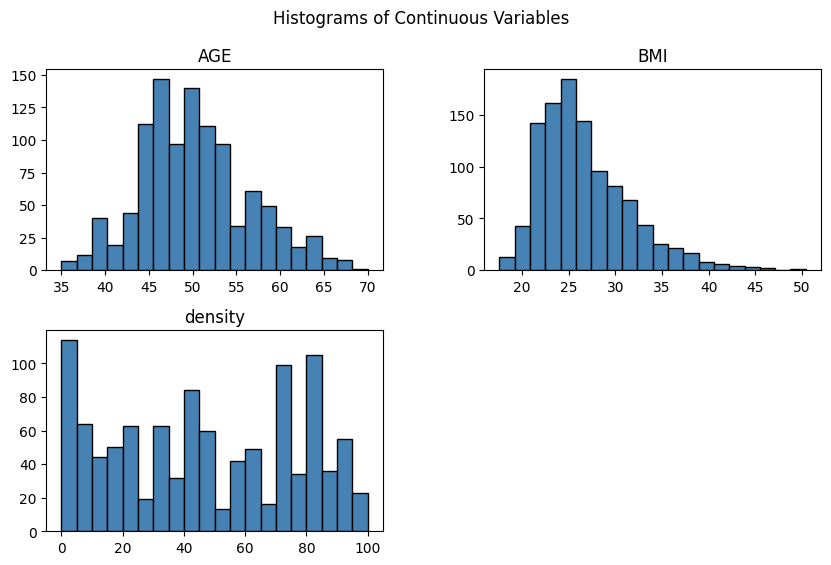

In [7]:
import matplotlib.pyplot as plt

# Histograms for continuous variables (AGE, BMI, density)
df_cancer[['AGE', 'BMI', 'density']].hist(bins=20, color='steelblue', edgecolor='black', figsize=(10, 6), grid=False)
plt.suptitle('Histograms of Continuous Variables')
plt.show()

Here is a breakdown of the above visualisations for the specified attributes in the dataset:

**1. AGE:**
* The age distribution is roughly bell-shaped, which suggests that the data follows a normal distribution.
* Most women are between the ages of 45 and 55, with a peak around 50 years old.
* Fewer women are at the lower end (35-40) and higher end (65-70) of the age range.

**2. BMI (Body Mass Index):**
* The BMI histogram is right-skewed, meaning most women have a BMI concentrated between 20 and 30, with the peak around 25-30, which is in the "normal" to "overweight" range.
* Fewer women have higher BMIs, with only a small number having BMI values above 35 (considered obese).

**3. Mammographic Density:**

* The distribution of mammographic density is quite spread out, with peaks at multiple points.
* There are noticeable spikes at 0, 20-30, and 80-100% density, meaning that many women have either very low or very high density, with varying levels in between.

**Key Insights:**

* Age is normally distributed, with most women around 50 years old.
* BMI is skewed towards lower values, with most women being in the normal to overweight range.
* Mammographic density varies widely, with many women having either very low or very high breast density.

###  Visual Exploration: Box Plot ###

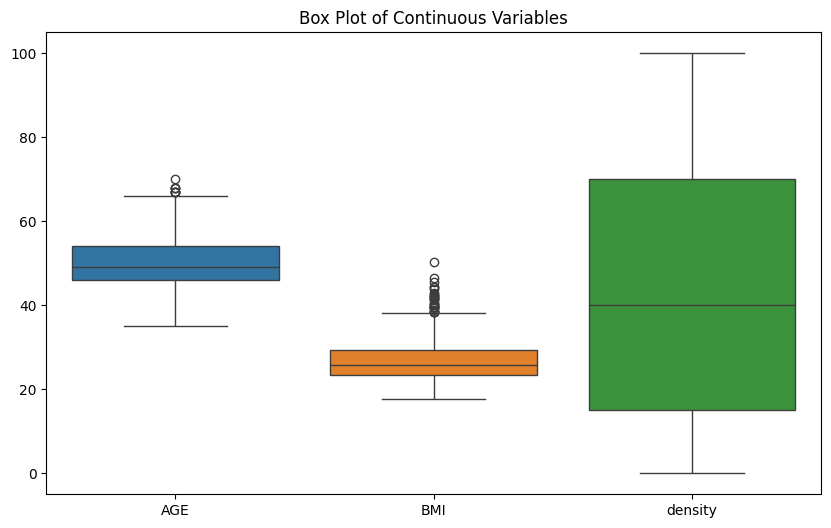

In [8]:
import seaborn as sns

# Box plots for continuous variables (to see outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cancer[['AGE', 'BMI', 'density']])
plt.title('Box Plot of Continuous Variables')
plt.show()

The Box plots are used to summarize the distribution of the three variables above, highlighting the median, quartiles, and any potential outliers.

**1. AGE:**
* **Box (middle 50%)**: Most of the women's ages are between 45 and 55 years (middle 50% of the data).
* **Median (middle line in the box)**: The median age is around 50 years.
* **Whiskers**: The lower whisker extends to about 35 years, and the upper whisker extends to about 60 years.
* **Outliers (dots)**: There are a few women older than 60 years, as shown by the dots above the upper whisker.

**2. BMI:**
* **Box (middle 50%)**: The majority of BMI values are between 23 and 30, representing the middle 50% of the BMI data.
* **Median**: The median BMI is close to 26, indicating that half the women have a BMI below this value and half above.
* **Whiskers**: The lower whisker goes down to around 18, while the upper whisker goes up to about 35.
* **Outliers**: There are many outliers above 35, represented by dots, indicating that a number of women have higher-than-normal BMI values (possibly in the obese range).

**3. Mammographic Density:**
* **Box (middle 50%)**: The middle 50% of mammographic density values are spread widely, ranging from around 15% to 70%.
* **Median**: The median density is around 40%.
* **Whiskers**: The whiskers extend from 0% to 100%, showing the full range of breast density in the sample.
* **No Outliers**: There are no outlier points in this box plot, suggesting that the values fall within the expected range.

**Key Insights:**

* **Age** and **BMI** both have outliers, particularly BMI, which has several participants with higher-than-normal values.
* **Mammographic density** has a wide range of values, but no extreme outliers.
* The plots show a clear summary of the distributions for each variable, indicating variability in BMI and density, while age is more normally distributed with fewer outliers.

##  Visual Exploration: Comparative Distribution of Variables by Case Group ####

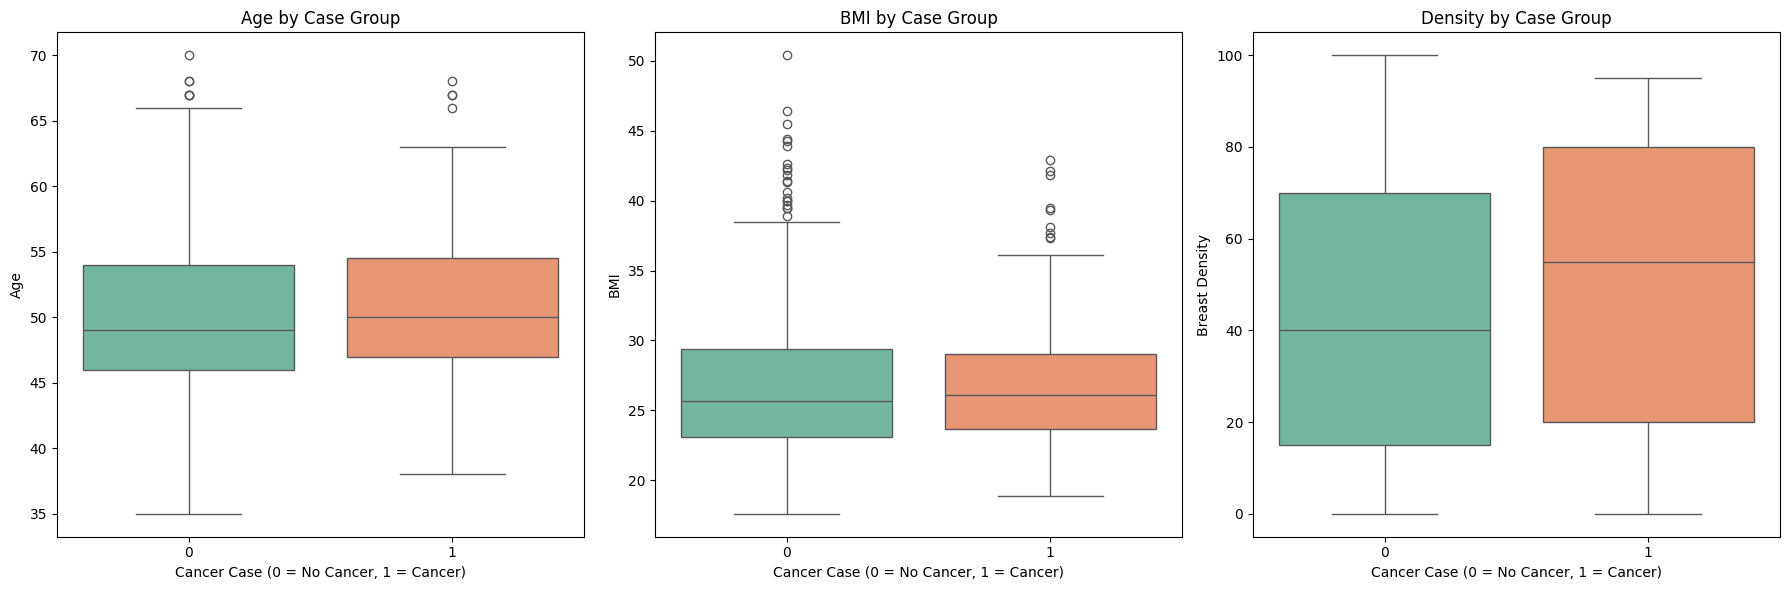

In [9]:
# Create a 1x3 grid of boxplots to compare the distribution of AGE, BMI, and density by case group (cancer/no cancer)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting AGE by case
sns.boxplot(x='case', y='AGE', data=df_cancer, ax=axes[0], palette="Set2")
axes[0].set_title('Age by Case Group')
axes[0].set_xlabel('Cancer Case (0 = No Cancer, 1 = Cancer)')
axes[0].set_ylabel('Age')

# Plotting BMI by case
sns.boxplot(x='case', y='BMI', data=df_cancer, ax=axes[1], palette="Set2")
axes[1].set_title('BMI by Case Group')
axes[1].set_xlabel('Cancer Case (0 = No Cancer, 1 = Cancer)')
axes[1].set_ylabel('BMI')

# Plotting density by case
sns.boxplot(x='case', y='density', data=df_cancer, ax=axes[2], palette="Set2")
axes[2].set_title('Density by Case Group')
axes[2].set_xlabel('Cancer Case (0 = No Cancer, 1 = Cancer)')
axes[2].set_ylabel('Breast Density')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

The box plots provide insights into how demographic and cliical measures vary across different diagnostic groups ('No Cancer' vs. 'Cancer'). Here are some findings based on the visualizations:

**Key Insights:**

* **Age** doesn't seem to vary much between women who developed breast cancer and those who did not.
* **BMI** is slightly higher in women who developed breast cancer, but there are many outliers in both groups.
* **Breast Density** is higher in women who developed breast cancer, suggesting a potential relationship between higher breast density and increased breast cancer risk.

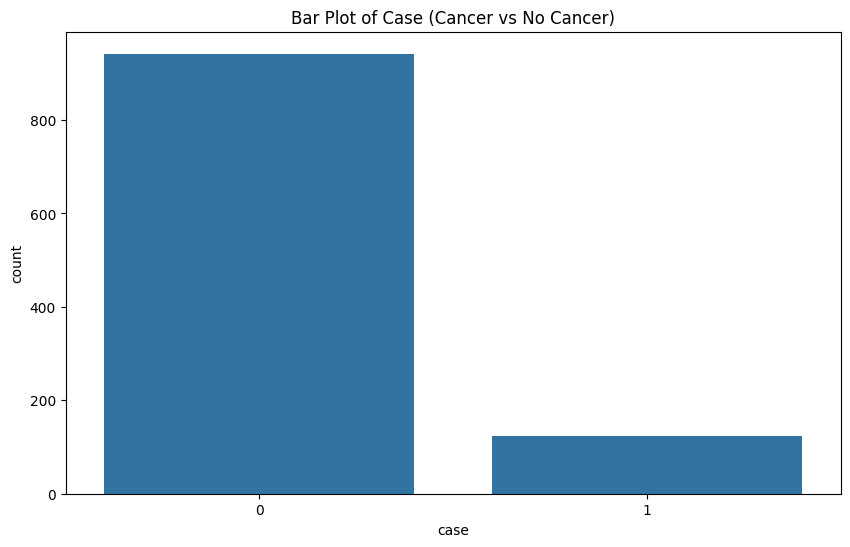

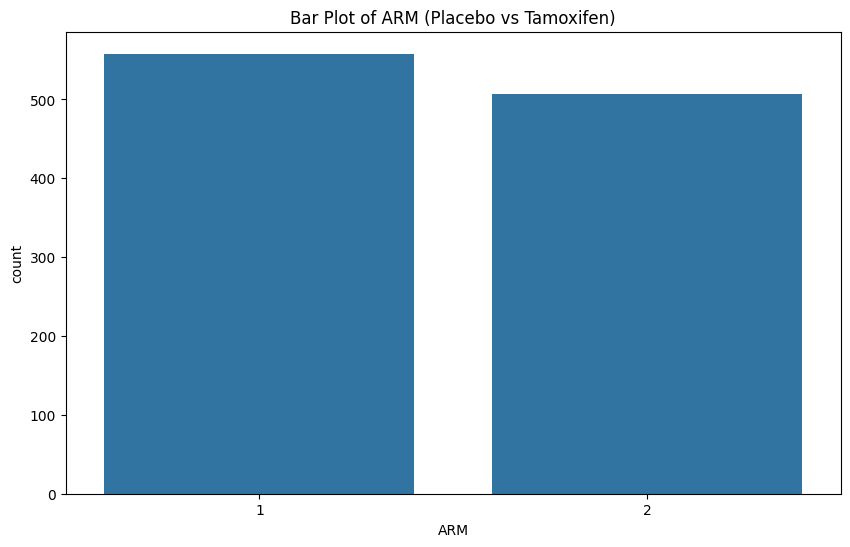

In [10]:
# Bar plots for categorical variables (case, ARM)
plt.figure(figsize=(10, 6))
sns.countplot(x='case', data=df_cancer)
plt.title('Bar Plot of Case (Cancer vs No Cancer)')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='ARM', data=df_cancer)
plt.title('Bar Plot of ARM (Placebo vs Tamoxifen)')
plt.show()

**Key Insight**:

**1. Case:** 

The bar plot shows the comparison between two groups of women: those who did not develop breast cancer (represented by **0**) and those who did develop breast cancer (represented by **1**).

* Most of the women in this dataset did not develop breast cancer, as shown by the large height difference between the two bars.
* This visualises the imbalance between the two groups (cases vs. non-cases), which is typical in medical studies where the condition being studied (like cancer) affects a smaller portion of the population.

**2. ARM:** 

The bar plot shows a comparison between two groups in a study, labeled as **ARM 1** and **ARM 2**:

**ARM 1:** Representing the placebo group (participants who did not receive tamoxifen).

**ARM 2:** Representing the tamoxifen group (participants who received tamoxifen).

* The two bars are almost equal in height, indicating that the number of women in both the placebo and tamoxifen groups is nearly the same. This suggests that the trial had a balanced allocation of participants between the two groups, which is typical for a randomized controlled trial.

## <font color=blue> Data Transformation </font> ##

Continuous variables like Age, BMI, and Mammographic Density have different ranges.These differences in range can make certain models (like logistic regression) sensitive to one variable more than others due to the scale. To address this, we standardize the data.

In [11]:
from sklearn.preprocessing import StandardScaler

# Normalize the continuous variables (AGE, BMI, density) using standardization (mean = 0, std = 1)
scaler = StandardScaler()
df_cancer[['AGE', 'BMI', 'density']] = scaler.fit_transform(df_cancer[['AGE', 'BMI', 'density']])

# Display the transformed data

df_cancer.head()

,case,ARM,AGE,BMI,density
0,1,1,-1.958928,-1.021820,-0.147562
1,0,1,-1.153796,1.166830,-1.307978
2,0,1,-0.670716,-0.771689,0.018212
3,0,2,0.295442,-1.480394,-0.147562
4,0,1,1.422627,-0.104672,-0.147562


The standardized table shows that continuous variables like Age, BMI, and Mammographic Density have been transformed with a mean of **0** and a standard deviation of **1**. This ensures that the variables are now on the same scale and prevents bias caused by variables with larger ranges.

## <font color=blue> Logistic Regression </font> ##

Logistic regression is a well-suited model since the goal is to predict a binary outcome (such as whether or not a patient has breast cancer or not).  It will allows us to estimate the probability of the outcome (cancer or no cancer) based on one or more predictor variables (e.g., age, BMI, mammographic density). 

This model is easy to understand because it shows how each of these factors affects the chances of getting breast cancer. It also gives a probability (a number between 0 and 1) for each prediction, which can be used to decide whether to classify someone as having breast cancer or not.

### Addressing Class Imbalance ###

Since the data is imbalanced, meaning there are significantly fewer cancer cases than non-cancer cases, we will:

1. **Employ class weighting:** This ensures that the minority class (cancer) is given more weight during model training, so the algorithm pays more attention to it.

2. **Use cross-validation:** Cross-validation helps to assess how well the model generalizes across different subsets of the data and ensures robust evaluation metrics, especially in the presence of imbalance.

#### Fitting Model ####

Let's fit the model

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# Selecting relevant features and target
X = df_cancer[['AGE', 'BMI', 'density']]  # Predictors
y = df_cancer['case']  # Outcome
               
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
               
# Fit the Logistic Regression model with class_weight='balanced' to handle class imbalance
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)   
           
# Perform cross-validation to generalize the data
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc')
               
# Fit the model on the training data
logreg.fit(X_train, y_train)  

# Predict on the test data
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class (1)

# # Print the results
# print("Predicted Class Labels (y_pred):")
# print(y_pred)

# print("\nPredicted Probabilities for Class 1 (y_proba):")
# print(y_proba)

A 70-30 train-test split was used to ensure that 70% of the data is used for training the model, while 30% is kept aside to test how well the model performs on new, unseen data. This helps evaluate how the model generalizes to new cases.

The 5-fold cross-validation (CV) further divides the training data into 5 equal parts, using 4 parts for training and 1 part for testing in each fold, rotating until all parts are tested. This process ensures that the model is tested on different subsets of the data, reducing the chances of overfitting. Cross-validation gives a more reliable estimate of how well the model performs across various data splits.

#### Statistical Analysis ####

After fitting the model, we can extract the coefficients, and p-values. While Scikit-learn does not provide p-values and odds ratios directly, we can use Statsmodels for a more detailed analysis.

In [13]:
import statsmodels.api as sm

# Add a constant to the predictors for statsmodels
X_train_sm = sm.add_constant(X_train)

# Fit the logistic regression model using statsmodels
logreg_sm = sm.Logit(y_train, X_train_sm)
result = logreg_sm.fit()

# Print the summary of the logistic regression model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.353244
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  745
Model:                          Logit   Df Residuals:                      741
Method:                           MLE   Df Model:                            3
Date:                Tue, 24 Sep 2024   Pseudo R-squ.:                 0.02001
Time:                        01:05:35   Log-Likelihood:                -263.17
converged:                       True   LL-Null:                       -268.54
Covariance Type:            nonrobust   LLR p-value:                   0.01318
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0779      0.120    -17.387      0.000      -2.312      -1.844
AGE            0.2045      0.

This output above shows the results of a logistic regression model that was used to predict the likelihood of breast cancer (case) based on three factors: Age, BMI, and Mammographic Density.

**Key Insights:**

**1. Intercept (const):**

* The value of -2.0779 is the model's intercept, meaning it's the baseline log-odds of a woman having breast cancer if age, BMI, and density are all zero (which doesn't have much real-world interpretation but is mathematically necessary).

**2. Age:**

* The coefficient for Age is 0.2045, but with a p-value of 0.086, which means it is not statistically significant (typically, a p-value below 0.05 is considered significant). So, age might not strongly influence breast cancer risk in this model.

**3. BMI:**

* The coefficient for BMI is 0.2829, with a p-value of 0.021. This indicates that BMI is a statistically significant predictor of breast cancer risk. A higher BMI is associated with a higher likelihood of developing breast cancer.

**4. Mammographic Density:**

* The coefficient for Density is 0.3604, with a p-value of 0.006. This means that higher breast density is also a significant predictor of breast cancer, with higher density being associated with a higher risk.

**Summary:** 

In this model, BMI and Breast Density are statistically significant predictors of breast cancer, meaning they play an important role in determining the likelihood of having cancer. However, Age does not appear to be as strong a predictor in this particular analysis. The overall model is significant (with a p-value of 0.013), meaning it does a decent job of explaining the variation in breast cancer cases based on the factors used.

#### Evaluating Model Performance ####

Once the model is fitted, let's evaluate its performance using relevant metrics

Number of mislabeled points out of a total 320 points : 135


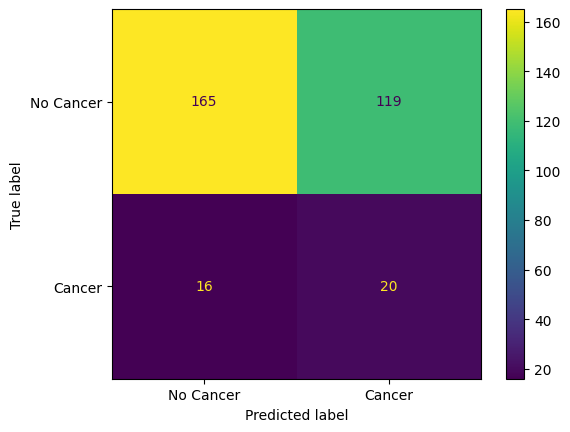

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Evaluate performance metrics

report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
conf_matrix=confusion_matrix(y_test, y_pred)
labels=['No Cancer', 'Cancer']
ConfusionMatrixDisplay(conf_matrix, display_labels=labels).plot()

# output the number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d' % (X_test.shape[0], (y_test != logreg.predict(X_test)).sum()))

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.58      0.71       284
           1       0.14      0.56      0.23        36

    accuracy                           0.58       320
   macro avg       0.53      0.57      0.47       320
weighted avg       0.83      0.58      0.66       320



Based on the result achieved, the model is struggling with a high number of misclassifications, particularly in the form of **False Positives (119)** and **False Negatives (16)**, indicating that it is performing poorly in identifying cancer cases. Despite using class weighting (class_weight='balanced'), the model is still failing to properly recognize many of the actual cancer cases, as seen in the confusion matrix. The model’s recall for cancer cases is **moderate (56%)**, meaning it's missing many true cancer cases, and the overall performance for the minority class (cancer) remains unsatisfactory.

**To better handle the class imbalance, we could try SMOTE (Synthetic Minority Oversampling Technique), which generates synthetic data for the minority class (Cancer) to balance the dataset. This could help the model learn more about cancer cases and potentially improve performance.**

Number of mislabeled points out of a total 320 points : 135


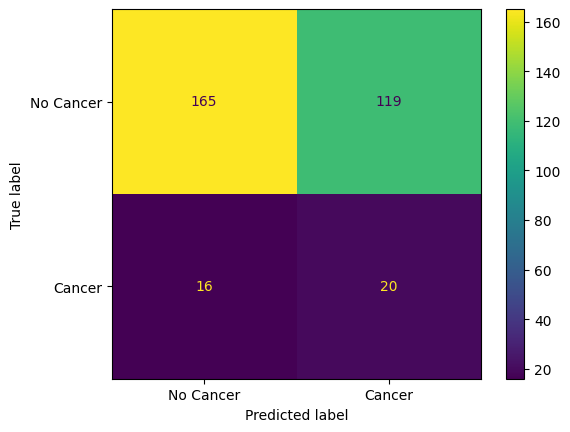

In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fit a logistic regression model on the resampled data
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(X_train_resampled, y_train_resampled)

# Perform cross-validation to generalize the data
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc')
               
# Fit the model on the training data
logreg.fit(X_train, y_train)  

# Predict on the test data
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class (1)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Evaluate performance metrics

report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
conf_matrix=confusion_matrix(y_test, y_pred)
labels=['No Cancer', 'Cancer']
ConfusionMatrixDisplay(conf_matrix, display_labels=labels).plot()

# output the number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d' % (X_test.shape[0], (y_test != logreg.predict(X_test)).sum()))


#### Model Evaluation Summary ####

The confusion matrix above shows that even after performing **SMOTE (Synthetic Minority Over-sampling Technique**) to balance the dataset, the model is still performing poorly with the same results as before. Here's a breakdown of the results and possible explanations:

**Confusion Matrix Breakdown:**

**True Negatives (No Cancer, correctly classified): 165**

**False Positives (No Cancer, incorrectly classified as Cancer): 119**

**False Negatives (Cancer, incorrectly classified as No Cancer): 16**

**True Positives (Cancer, correctly classified): 20**


The classification report provides several metrics to evaluate the performance of the model for each class (0: No Cancer, 1: Cancer). Here's a breakdown of the key metrics and their interpretation:

**1. Precision:**

* **Class 0 (No Cancer)**: Precision is **0.91**, meaning that 91% of the cases predicted as "No Cancer" were actually "No Cancer."
* **Class 1 (Cancer)**: Precision is **0.14**, meaning that only 14% of the cases predicted as "Cancer" were actually cancer cases. This indicates that the model is not good at predicting cancer accurately, leading to a lot of false positives.

**2. Recall:**

* **Class 0 (No Cancer)**: Recall is **0.58**, meaning the model correctly identified 58% of the "No Cancer" cases. It missed 42% of them (false negatives).
* **Class 1 (Cancer)**: Recall is **0.56**, meaning the model correctly identified 56% of the actual cancer cases. This is a relatively decent recall, given that the model is catching over half of the cancer cases.

**3. F1-Score:**

* **Class 0 (No Cancer)**: F1-score is **0.71**, indicating a good balance between precision and recall for this class.
* **Class 1 (Cancer)**: F1-score is **0.23**, which is very low, indicating that the model is performing poorly when it comes to predicting cancer cases, due to the very low precision.

**4. Accuracy:**

* The model's accuracy is **0.58**, meaning it correctly predicted 58% of the cases. However, accuracy can be misleading when there is class imbalance, as in this case.


Even after applying SMOTE, the model's performance remains poor, particularly with a high number of false positives and false negatives. This suggests that we can try another machine learning models to improve the model’s performance in predicting breast cancer cases.

<!-- We are going to create a new column with readable labels for cancer cases, to make the dataset more interpretable, and useful for a wider audience, improving clarity during analysis and visualization using apply() lambda function. -->

In [17]:
# # Create a new column 'Group' based on the 'case' column
# df_cancer['Diagnosis'] = df_cancer['case'].apply(lambda x: 'Cancer' if x == 1 else 'No cancer')

# # Display the first few rows to confirm
# print(df_cancer[['case', 'Diagnosis']].head())
# df_cancer.head()

### ROC Curve and its Visualization ###

0.571449530516432


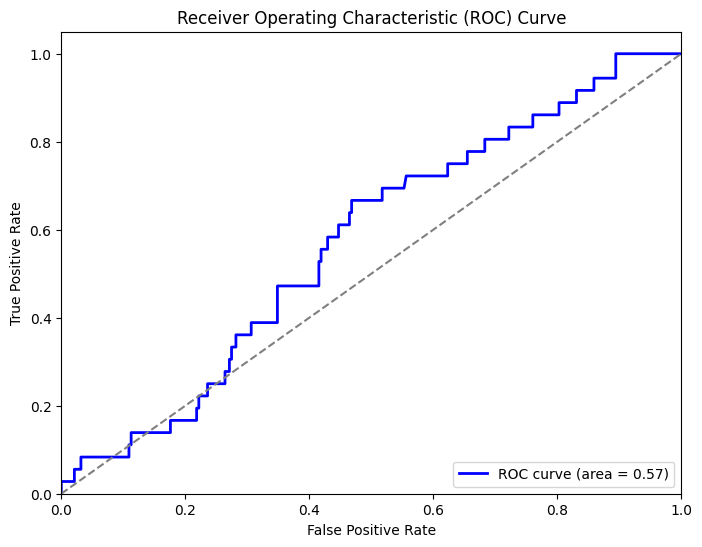

In [18]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

print(roc_auc)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random performance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC curve (Receiver Operating Characteristic curve) is a visual representation of how well your model is distinguishing between the positive and negative classes—in this case, between "Cancer" and "No Cancer". Here's an explanation:

**Understanding the ROC Curve:**

* **X-axis (False Positive Rate)**: This shows the proportion of cases where the model incorrectly predicted Cancer (positive) when the actual case was No Cancer (negative). A low value on this axis is better, meaning fewer incorrect cancer predictions.

* **Y-axis (True Positive Rate)**: This shows the proportion of cases where the model correctly predicted Cancer when the person actually has cancer. A higher value on this axis is better, meaning the model correctly identifies more cancer cases.

* **The Blue Line:**

    * This line represents the performance of the model.
    * The line is closer to the diagonal, indicating the model is not performing much better than random guessing (which would be a straight diagonal line).
    
* **The Diagonal Line (Dashed):**

    * This represents a model that is making predictions by random guessing. The model’s ROC curve follows this diagonal line, meaning the model is no better than random at distinguishing between "Cancer" and "No Cancer."
    
**Area Under the Curve (AUC = 0.57):**

* The **AUC (Area Under the Curve)** measures the overall performance of the model. A perfect model would have an AUC of 1.0, and a model that is guessing randomly would have an AUC of 0.5.

* In this case, the AUC is 0.57, which means the model is only slightly better than random guessing at distinguishing between cancer and non-cancer cases.

**In Summary:**

* The ROC curve shows that the model has limited ability to distinguish between cancer and no cancer cases, with an AUC of 0.57.

* The model’s performance is not very strong, and it suggests that there is significant room for improvement. We might want to explore ways to improve the model, such as using a different model such as Random Forest.

## <font color=blue> Random Forest </font> ##

Using Random Forest to improve the model for predicting breast cancer can offer several advantages over logistic regression, particularly in the context of your imbalanced dataset and the current performance issues (e.g., high false positives and false negatives, low ROC-AUC score). Here's why Random Forest may be a better choice:

1. **Random Forest** is an ensemble learning method that builds multiple decision trees and combines their predictions, making it more robust and less prone to overfitting compared to single models like logistic regression.

2. It handles **imbalanced datasets** better by using techniques like class weighting and sampling internally, which can improve the model's ability to identify minority classes, such as cancer cases.

3. Random Forest is capable of capturing non-linear relationships between the features and the target variable, which might be missed by logistic regression, potentially improving predictive performance.

4. It provides **feature importance**, which can help identify the most influential predictors in the model (e.g., which features are most associated with cancer risk).

5. **Random Forest** is generally more effective at handling high-dimensional data and can improve model performance without much tuning, making it a practical choice for improving a model with low accuracy and high misclassification rates.

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Define the predictors and outcome
X = df_cancer[['AGE', 'BMI', 'density']]  # Predictors
y = df_cancer['case']  # Outcome

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Shape of the datasets
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Initialize the Random Forest model with class_weight='balanced' to handle class imbalance
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Perform cross-validation to evaluate model consistency
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')

# Fit the Random Forest model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class (Cancer)


### Feature Importance ###

Let's extract and visualize the feature importances from the random forest model we trained. This will help to understand which features have the most influence on the decisions made by the model.

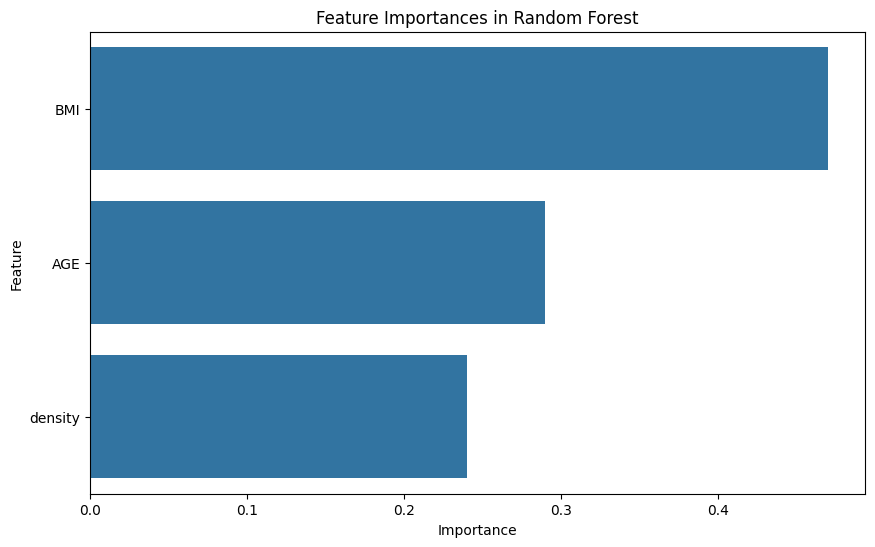

,Feature,Importance
1,BMI,0.470367
0,AGE,0.289551
2,density,0.240082


In [20]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print the DataFrame for reference
feature_importance_df

Here's what we can observe

Key Insights:

1. **BMI** is the most important feature, with the highest importance score (around 0.45). This suggests that the model relies heavily on BMI to make predictions about whether a patient has cancer.

2. **AGE** is the second most important feature, with an importance score around 0.3. This means that age is also a significant predictor, but less important than BMI in this context.

3. **Density** has the lowest importance score (around 0.2), which means the model considers it the least important among the three features for predicting cancer in this dataset.

**Conclusion:**

* The model prioritizes BMI as the strongest predictor of cancer risk, followed by Age and then Breast Density.

### Evaluating Model Performance ###

Next, we'll evaluate our model using these parameters on the test set. We will also look at other performance metrics like the confusion matrix, classification report and the ROC curve. Let's proceed with this evaluation.

Number of mislabeled points out of a total 320 points : 37


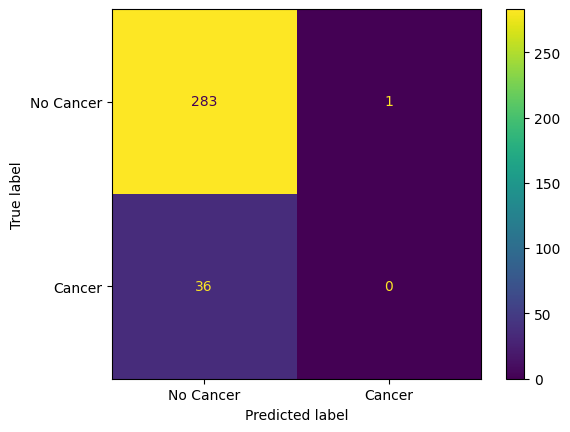

In [21]:
# Evaluate performance metrics
report = classification_report(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix
labels = ['No Cancer', 'Cancer']
ConfusionMatrixDisplay(conf_matrix, display_labels=labels).plot()

# output the number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d' % (X_test.shape[0], (y_test != rf_model.predict(X_test)).sum()))

#### Model Evaluation Summary ####

Here's a breakdown of the results and possible explanations:

**Confusion Matrix Breakdown:**

**True Negatives (No Cancer, correctly classified): 283**

**False Positives (No Cancer, incorrectly classified as Cancer): 1**

**False Negatives (Cancer, incorrectly classified as No Cancer): 36**

**True Positives (Cancer, correctly classified): 0**

In [22]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       284
           1       0.00      0.00      0.00        36

    accuracy                           0.88       320
   macro avg       0.44      0.50      0.47       320
weighted avg       0.79      0.88      0.83       320



The classification report provides several metrics to evaluate the performance of the model for each class (0: No Cancer, 1: Cancer). Here's a breakdown of the key metrics and their interpretation:

**1. Precision:**

* **Class 0 (No Cancer)**: Precision is **0.89**, meaning that 89% of the cases predicted as "No Cancer" were actually "No Cancer." This is a high precision for the No Cancer class, indicating that the model does a good job of avoiding false positives when predicting "No Cancer."
* **Class 1 (Cancer)**: Precision is **0.00**, meaning that none of the cases predicted as "Cancer" were actually cancer cases. This indicates the model is failing to make any correct predictions for the Cancer class. It does not predict any true positive cancer cases.

**2. Recall:**

* **Class 0 (No Cancer)**: Recall is **1.00**, meaning the model correctly identified 100% of the "No Cancer" case.This is excellent recall for the No Cancer class, as the model catches all "No Cancer" cases.

* **Class 1 (Cancer)**: Recall is **0.00**, meaning the model  did not identify any of the actual cancer cases. It missed all 36 actual cancer cases.

**3. F1-Score:**

* **Class 0 (No Cancer)**: F1-score is **0.94**, which indicates a strong balance between precision and recall for the No Cancer class.The high F1-score reflects the model’s excellent ability to correctly classify the No Cancer class.

* **Class 1 (Cancer)**: F1-score is **0.00**, which is very low and reflects the poor performance of the model in identifying cancer cases. This happens because both precision and recall are 0 for this class, leading to an F1-score of 0, which shows that the model completely fails in cancer detection.

**4. Accuracy:**

* The model's accuracy is **0.88**, meaning it correctly predicted 88% of the cases. While the overall accuracy is high, it is misleading due to the class imbalance: the model is excellent at predicting "No Cancer" but fails completely at predicting "Cancer."

* Since cancer cases are underrepresented, accuracy appears high, but this masks the fact that the model is performing very poorly for the minority class (Cancer)


**Summary:**

* The model does very well in predicting No Cancer (high precision, recall, and F1-score), but it completely fails in predicting Cancer (all metrics are 0 for class 1).

* While the overall accuracy seems decent at 88%, this is due to the overwhelming number of No Cancer cases, and the model’s complete failure to detect cancer makes it unreliable in practice.

* This poor performance for the Cancer class likely arises due to class imbalance.


The model is highly biased towards predicting No Cancer, which leads to many missed cancer cases. This means that while the model might appear to have high accuracy due to correctly predicting most No Cancer cases, it performs very poorly when it comes to detecting cancer, making it unreliable for real-world use where detecting cancer is critical.

**Adjusting the threshold in the Random Forest model to manage the trade-offs between sensitivity (true positive rate) and specificity (false positive rate) using the Youden's index concept. This process typically aims to find a balance where you can reduce the number of false positives without significantly increasing the number of false negatives.**

### ROC Curve and its Visualization ###

In [23]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

print(roc_auc)

0.6035309076682316


Choose a threshold that balances sensitivity and specificity, which often means maximizing the Youden’s index (J = Sensitivity + Specificity - 1):

In [24]:
# Calculate the Youden's index
J = tpr - fpr
optimal_idx = np.argmax(J)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold: {optimal_threshold}")

Optimal threshold: 0.16


In [25]:
# Make predictions based on the optimal threshold
y_pred_optimal = (y_proba_rf >= optimal_threshold).astype(int)

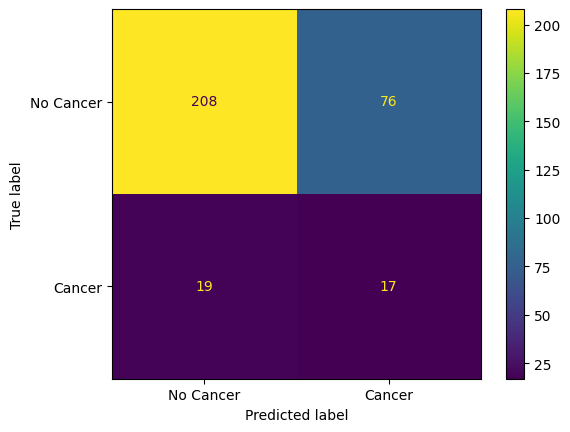

In [26]:
# Confusion matrix
conf_matrix=confusion_matrix(y_test, y_pred_optimal)

# Plotting the confusion matrix
labels = ['No Cancer', 'Cancer']
ConfusionMatrixDisplay(conf_matrix, display_labels=labels).plot()

This matrix shows the model's performance after adjusting the threshold:

* **True Negatives (TN = 208)**: The model correctly predicted 'No Cancer' for 283 individuals.
* **False Positives (FP = 76)**: 76 individuals who did not have cancer was incorrectly predicted as having cancer.
* **False Negatives (FN = 19)**: The model failed to detect cancer in 19 individuals who actually had cancer.
* **True Positives (TP = 17)**: The model now correctly identifies 17 cancer cases.

**Key Points:**

* **Sensitivity of 47.2%:** This is considered a low rate of sensitivity. It indicates that the model identifies less than half of the actual cancer cases, which could be problematic in medical settings where missing a diagnosis has serious implications.

* **Specificity of 73.2%:** This can be considered a moderate to high rate of specificity. It suggests that the model is reasonably good at identifying non-cancer patients, although there is still a significant number of false positives.


**Why the Second Matrix is Better**

* **Improved Cancer Detection**: The primary goal in medical diagnostics, particularly for conditions like cancer, is to ensure that all actual cases are detected. The second matrix shows a significant improvement in detecting actual cases of cancer (from 0 to 17 true positives), which is crucial for timely and potentially life-saving treatments.

* **Acceptable Trade-off:** The increase in false positives (from 1 to 76) represents a trade-off. In many medical scenarios, the cost of a false positive (additional tests and temporary anxiety) is considered acceptable if it means fewer missed cases of cancer. The second matrix suggests that the model has been adjusted to be more sensitive, capturing more true cases at the expense of more false alarms.

* **Use of Youden’s Index**: Adjusting the threshold based on Youden’s index helps in finding a balance where the gain in sensitivity outweighs the loss in specificity. This index maximizes the difference between true positive rate and false positive rate, optimizing the model for the most effective overall performance in distinguishing between having cancer and not having cancer.

     * J=0.47+0.73−1=0.2 or 20%

        **The Youden’s index of 0.2** indicates a diagnostic test that provides limited accuracy in predicting cancer. While it suggests that the test has some discriminative power between detecting actual cancer cases and those who do not, the level might not be sufficient for critical clinical decisions without additional supportive evidence or combined testing strategies. 

**Conclusion**

The second confusion matrix is preferable for its enhanced ability to detect true cases of cancer, reflecting a prioritization of sensitivity in a medical context where missing a diagnosis can have severe consequences. The adjusted threshold helps the model to catch more true cases, which is often the primary objective in medical testing environments.

In [27]:
# Classification report
print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81       284
           1       0.18      0.47      0.26        36

    accuracy                           0.70       320
   macro avg       0.55      0.60      0.54       320
weighted avg       0.83      0.70      0.75       320



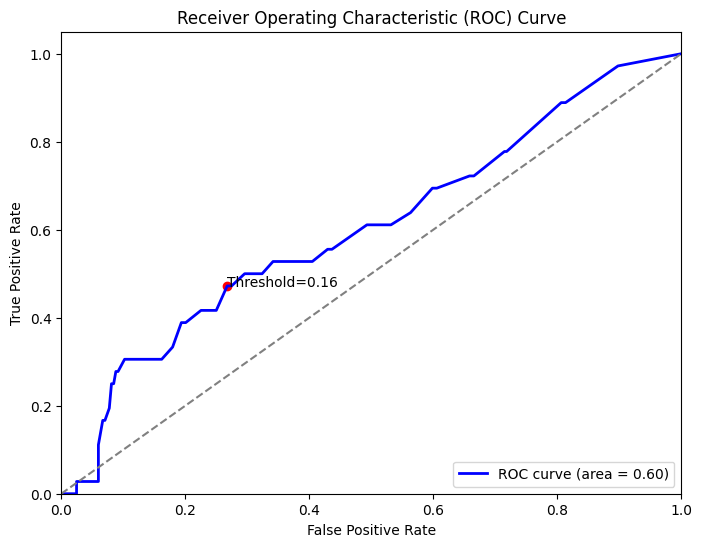

In [28]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random performance)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red')  # mark the optimal point
plt.text(fpr[optimal_idx], tpr[optimal_idx], f'Threshold={optimal_threshold:.2f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

This ROC (Receiver Operating Characteristic) curve shows how well the model is distinguishing between cancer and non-cancer cases.

Here's what we observe: 

**Key Components of the ROC Curve:**

**1. Horizontal Axis (False Positive Rate, FPR)**: This axis represents the proportion of healthy patients (those without cancer) who are incorrectly identified by the test as having cancer. Ideally, you want this number to be low because it means fewer healthy people are wrongly diagnosed.

**2. Vertical Axis (True Positive Rate, TPR or Sensitivity)**: This axis shows how many of the actual cancer patients the test correctly identifies. A higher number here is good because it means the test is effective at detecting cancer in those who have it.

**3. Curve:**

* The blue line traces how the sensitivity and false positive rate of the test change as you adjust the "threshold" at which the test decides someone has cancer.
* The shape of this curve helps us understand the trade-off between identifying all patients with cancer and avoiding incorrect cancer diagnoses in healthy patients.

**4. Threshold Mark (Threshold=0.16):**

* The marked point on the curve indicates a specific threshold value (0.16). At this point, the test starts saying a patient has cancer if their test result is 0.16 or higher.
* A threshold of 0.16 is relatively low, suggesting that the test errs on the side of diagnosing cancer more frequently to ensure that cases of cancer are not missed.

**5. Diagonal Dashed Line:**

* This line represents a no-skill classifier, an indicator of a test that does no better than random chance. Ideally, the ROC curve should be above this line, indicating that the test has the ability to distinguish between the conditions better than flipping a coin would.

**6. Area Under the Curve (AUC = 0.60):**

* The AUC measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1). This value (0.60) tells us that the test is somewhat effective but not excellent (where 1.0 would be a perfect test). An AUC closer to 1 means a better test, while an AUC closer to 0.5 means the test isn't much better than guessing.


**Simplified Explanation:**

Imagine you are using a net to catch fish of a specific type. The ROC curve tells you how well your net distinguishes the fish you want from those you don't. The point where the threshold is set at 0.16 is like deciding how wide the holes in your net should be—too wide, and you catch too many of the wrong fish (false positives); too narrow, and you miss many of the fish you want (false negatives). This curve is showing that at a setting of 0.16, you're choosing to catch more fish to ensure you don't miss the ones you really want, even though you'll catch some you don't want as well. This setting is particularly useful in scenarios like medical diagnostics where it's crucial not to miss detecting a serious condition like cancer.

**In summary:**
The ROC curve and AUC score show that the model is only moderately effective at distinguishing between cancer and no cancer cases. It’s better than random guessing, but there is still significant room for improvement. A higher AUC (closer to 1) would indicate a better performing model.